In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import json

In [47]:
first_step_folder = "../01_GeneratePureSpectrums/"
sims_filename = first_step_folder+"sims_01.csv"
sims_df = pd.read_csv(sims_filename)
pure_spec_sims_df = sims_df

pickle_files = first_step_folder+'specs/'+sims_df['filename']+'.pkl'
soil_resolutions = sims_df['soil_resolution']
res_info_files = first_step_folder+'ResInfo/res_info_'+soil_resolutions+'.json'
res_infos = [json.load(open(res_info_file, 'r')) for res_info_file in res_info_files]
pure_res_infos = res_infos

In [48]:
elem_maps_folder = first_step_folder+'ElemMaps/'
elem_maps_files = elem_maps_folder+'ELEMS_'+sims_df['filename']+'.csv'
elem_maps = [pd.read_csv(elem_map_file) for elem_map_file in elem_maps_files]
pure_elem_maps = elem_maps
elem_ids = [pure_elem_maps[i][pure_elem_maps[i].columns[0]].to_list() for i in range(len(pure_elem_maps))]
avg_elem_samples = [pure_elem_maps[i][res_infos[i]['cell_ids']].mean(axis=1) for i in range(len(pure_elem_maps))]
avg_carbon_portion = [avg_elem_samples[i][elem_ids[i].index(6000)] for i in range(len(pure_elem_maps))]

pure_avg_carbon_portion = np.array(avg_carbon_portion)

In [49]:
elem_map_array = np.array([avg_elem_sample.to_list() for avg_elem_sample in avg_elem_samples])
pure_elem_maps = elem_map_array

In [50]:
density_maps_folder = first_step_folder+'Densities/'
density_maps_files = density_maps_folder+'DENSITIES_'+sims_df['filename']+'.csv'
densities = [pd.read_csv(density_map_file)['Density'].values for density_map_file in density_maps_files]
avg_densities = [density.mean() for density in densities]
pure_avg_densities = avg_densities


In [51]:
specs_files = first_step_folder+'specs/'+sims_df['filename']+'.pkl'
specs = [pickle.load(open(specs_file, 'rb')) for specs_file in specs_files]
tally_t = 1
binss = [td[0][tally_t][-2] for td in specs]
tallies = [td[1][tally_t] for td in specs]

In [52]:
detector_tally = np.array(tallies)
detector_tally = detector_tally.squeeze()

In [53]:
pure_bins = np.array(binss)
pure_tally = np.array(detector_tally)

In [54]:
third_step_folder = "../03_CommonSoilData/"
sims_filename = third_step_folder+"sims_03.csv"
sims_df = pd.read_csv(sims_filename)
levs_sims_df = sims_df.copy()

pickle_files = third_step_folder+'specs/'+sims_df['filename']+'.pkl'
soil_resolutions = sims_df['soil_resolution']
res_info_files = third_step_folder+'ResInfo/res_info_'+soil_resolutions+'.json'
res_infos = [json.load(open(res_info_file, 'r')) for res_info_file in res_info_files]
levs_res_infos = res_infos

In [55]:
elem_maps_folder = third_step_folder+'ElemMaps/'
elem_maps_files = elem_maps_folder+'ELEMS_'+sims_df['filename']+'.csv'
elem_maps = [pd.read_csv(elem_map_file) for elem_map_file in elem_maps_files]
elem_ids = [elem_maps[i][elem_maps[i].columns[0]].to_list() for i in range(len(elem_maps))]
avg_elem_samples = [elem_maps[i][res_infos[i]['cell_ids']].mean(axis=1) for i in range(len(elem_maps))]
avg_carbon_portion = [avg_elem_samples[i][elem_ids[i].index(6000)] for i in range(len(elem_maps))]

levs_avg_carbon_portion = np.array(avg_carbon_portion)

In [56]:
elem_map_array = np.array([avg_elem_sample.to_list() for avg_elem_sample in avg_elem_samples])
levs_elem_maps = elem_map_array

In [57]:
density_maps_folder = third_step_folder+'Densities/'
density_maps_files = density_maps_folder+'DENSITIES_'+sims_df['filename']+'.csv'
densities = [pd.read_csv(density_map_file)['Density'].values for density_map_file in density_maps_files]
avg_densities = [density.mean() for density in densities]
levs_avg_densities = avg_densities

In [58]:
pure_elem_maps.shape

(23, 8)

In [59]:
specs_files = third_step_folder+'specs/'+sims_df['filename']+'.pkl'
specs = [pickle.load(open(specs_file, 'rb')) for specs_file in specs_files]
tally_t = 1
binss = [td[0][tally_t][-2] for td in specs]
tallies = [td[1][tally_t] for td in specs]

In [60]:
detector_tally = np.array(tallies)
detector_tally = detector_tally.squeeze()

In [61]:
lev_bins = np.array(binss)
lev_tally = np.array(detector_tally)

In [62]:
exp_df = pd.concat([pure_spec_sims_df, levs_sims_df], axis=0, ignore_index=True)

In [63]:
exp_df['avg_carbon_portion'] = np.concatenate([pure_avg_carbon_portion, levs_avg_carbon_portion], axis=0)

In [64]:
exp_df['spectrum_bins'] = [b for b in np.concatenate([pure_bins, lev_bins], axis=0)]
exp_df['spectrum_tally'] = [t for t in np.concatenate([pure_tally, lev_tally], axis=0)]

In [65]:
pure_elem_maps.shape, levs_elem_maps.shape
# stack the above into exp_df['elem_maps']
exp_df['elem_maps'] = [pure_elem_maps[i] for i in range(len(pure_elem_maps))] + \
                       [levs_elem_maps[i] for i in range(len(levs_elem_maps))]

In [66]:
exp_df['avg_densities'] = np.concatenate([pure_avg_densities, levs_avg_densities], axis=0)

In [67]:
exp_df.to_pickle("ExpirementData.pkl")

In [68]:
exp_df

,soil_resolution,function,id,filename,avg_carbon_portion,spectrum_bins,spectrum_tally,elem_maps,avg_densities
0,7x7x7,Si,1000,7x7x7_Si_001000,0.0,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[0.000840412, 6.85e-07, 0.000600802, 0.0004206...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",2.33000
1,7x7x7,Al,1001,7x7x7_Al_001001,0.0,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[0.00106409, 8.95e-07, 0.0007947, 0.000577543,...","[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",2.70000
2,7x7x7,H,1002,7x7x7_H_001002,0.0,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[1.4694e-05, 1.1e-08, 1.1009e-05, 7.965e-06, 3...","[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]",0.00100
3,7x7x7,Na,1003,7x7x7_Na_001003,0.0,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[0.00075968, 6.04e-07, 0.000541638, 0.00038162...","[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]",0.97000
4,7x7x7,O,1004,7x7x7_O_001004,0.0,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[1.5841e-05, 1.1e-08, 1.1767e-05, 8.406e-06, 4...","[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]",0.00143
...,...,...,...,...,...,...,...,...,...
170,7x7x7,C_5000_Feldspar_Fill,3147,7x7x7_C_5000_Feldspar_Fill_003147,0.5,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[0.000796501, 6.16e-07, 0.000568609, 0.0003991...","[0.15892848226619807, 0.08468110812564669, 0.0...",1.54000
171,7x7x7,C_6000_Feldspar_Fill,3148,7x7x7_C_6000_Feldspar_Fill_003148,0.6,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[0.000768021, 6.46e-07, 0.000550425, 0.0003856...","[0.12714278581295765, 0.06774488650051685, 0.0...",1.33800
172,7x7x7,C_7000_Feldspar_Fill,3149,7x7x7_C_7000_Feldspar_Fill_003149,0.7,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[0.000730229, 6e-07, 0.000521664, 0.000366989,...","[0.0953570893597193, 0.050808664875387946, 0.0...",1.13600
173,7x7x7,C_8000_Feldspar_Fill,3150,7x7x7_C_8000_Feldspar_Fill_003150,0.8,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[0.000673689, 5.63e-07, 0.00048178, 0.00033918...","[0.06357139290647883, 0.0338724432502584, 0.0,...",0.93400


In [69]:
_spec = {}
_s = np.array(exp_df['spectrum_tally'].values.tolist())
for _, func in enumerate(exp_df['filename']):
    # print(func)
    _spec[func] = _s[_]

detector_df = pd.DataFrame.from_dict(_spec)

In [70]:
si_window = [3.35, 3.55]
c_window=[3.35, 3.55]
detector_bins = exp_df['spectrum_bins'].values[0]

In [71]:
detector_df['bins'] = detector_bins

In [72]:
detector_df.to_pickle("DetectorReadings.pkl")

In [73]:
import CortesAnalysisPackage as cap

In [74]:
fitting_df, c_lines_df, si_lines_df = cap.classical.PerpendicularDrop(
    df=detector_df, 
    bins=detector_bins,
    c_window=c_window,
    si_window=si_window,
    )



/home/jac2462@uta.edu/Documents/USDASummer2025/Steps/04_ApplyAnalysis/CortesAnalysisPackage/classical/__init__.py:105: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  c_lines_df[df.columns[i]+" baseline"] = c_baseline_lines[i]
/home/jac2462@uta.edu/Documents/USDASummer2025/Steps/04_ApplyAnalysis/CortesAnalysisPackage/classical/__init__.py:106: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  c_lines_df[df.columns[i]+" peak"] = c_peak_lines[i]
/home/jac2462@uta.edu/Documents/USDASummer2025/Steps/04_ApplyAnalysis/CortesAnalysisPackage/

In [75]:
detector_df

,7x7x7_Si_001000,7x7x7_Al_001001,7x7x7_H_001002,7x7x7_Na_001003,7x7x7_O_001004,7x7x7_Fe_001005,7x7x7_Mg_001006,7x7x7_C_001007,7x7x7_SiO2_001008,7x7x7_Al2O3_001009,...,7x7x7_C_1000_Feldspar_Fill_003143,7x7x7_C_2000_Feldspar_Fill_003144,7x7x7_C_3000_Feldspar_Fill_003145,7x7x7_C_4000_Feldspar_Fill_003146,7x7x7_C_5000_Feldspar_Fill_003147,7x7x7_C_6000_Feldspar_Fill_003148,7x7x7_C_7000_Feldspar_Fill_003149,7x7x7_C_8000_Feldspar_Fill_003150,7x7x7_C_9000_Feldspar_Fill_003151,bins
0,8.404120e-04,1.064090e-03,1.469400e-05,7.596800e-04,1.584100e-05,1.643980e-03,9.120430e-04,8.543980e-04,8.642660e-04,9.635360e-04,...,8.658780e-04,8.508560e-04,8.344220e-04,8.186930e-04,7.965010e-04,7.680210e-04,7.302290e-04,6.736890e-04,5.929290e-04,0.000000
1,6.850000e-07,8.950000e-07,1.100000e-08,6.040000e-07,1.100000e-08,1.489000e-06,7.630000e-07,6.880000e-07,6.930000e-07,8.150000e-07,...,7.320000e-07,6.490000e-07,6.600000e-07,6.210000e-07,6.160000e-07,6.460000e-07,6.000000e-07,5.630000e-07,4.980000e-07,0.000010
2,6.008020e-04,7.947000e-04,1.100900e-05,5.416380e-04,1.176700e-05,1.330060e-03,6.535110e-04,6.176260e-04,6.090960e-04,6.937200e-04,...,6.133160e-04,6.039490e-04,5.949720e-04,5.841830e-04,5.686090e-04,5.504250e-04,5.216640e-04,4.817800e-04,4.259010e-04,0.009045
3,4.206310e-04,5.775430e-04,7.965000e-06,3.816200e-04,8.406000e-06,1.047290e-03,4.585130e-04,4.379550e-04,4.213330e-04,4.886230e-04,...,4.275570e-04,4.219220e-04,4.156770e-04,4.081580e-04,3.991210e-04,3.856030e-04,3.669890e-04,3.391830e-04,2.990280e-04,0.018080
4,2.027580e-04,2.917970e-04,3.990000e-06,1.885240e-04,4.226000e-06,5.645540e-04,2.268500e-04,2.148290e-04,1.984800e-04,2.372060e-04,...,2.042030e-04,2.030920e-04,2.003200e-04,1.971800e-04,1.929110e-04,1.870590e-04,1.780250e-04,1.638170e-04,1.442870e-04,0.027114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,2.780000e-07,2.610000e-07,3.000000e-09,1.930000e-07,4.000000e-09,1.830000e-07,4.100000e-07,2.230000e-07,2.470000e-07,2.300000e-07,...,2.430000e-07,2.320000e-07,2.590000e-07,2.550000e-07,2.560000e-07,2.460000e-07,2.070000e-07,2.080000e-07,1.760000e-07,8.393360
931,3.110000e-07,2.640000e-07,2.000000e-09,2.010000e-07,3.000000e-09,2.030000e-07,4.150000e-07,2.240000e-07,2.320000e-07,2.300000e-07,...,2.200000e-07,2.390000e-07,2.420000e-07,2.170000e-07,2.470000e-07,2.250000e-07,2.130000e-07,2.130000e-07,1.850000e-07,8.402400
932,2.910000e-07,2.590000e-07,3.000000e-09,2.220000e-07,6.000000e-09,1.770000e-07,4.260000e-07,2.420000e-07,2.380000e-07,2.310000e-07,...,2.500000e-07,2.420000e-07,2.420000e-07,2.340000e-07,2.430000e-07,2.150000e-07,2.220000e-07,2.050000e-07,1.790000e-07,8.411430
933,2.950000e-07,2.370000e-07,4.000000e-09,2.070000e-07,4.000000e-09,1.660000e-07,3.930000e-07,2.140000e-07,2.250000e-07,2.170000e-07,...,2.590000e-07,2.240000e-07,2.260000e-07,2.370000e-07,2.450000e-07,2.170000e-07,2.090000e-07,1.990000e-07,1.740000e-07,8.420470


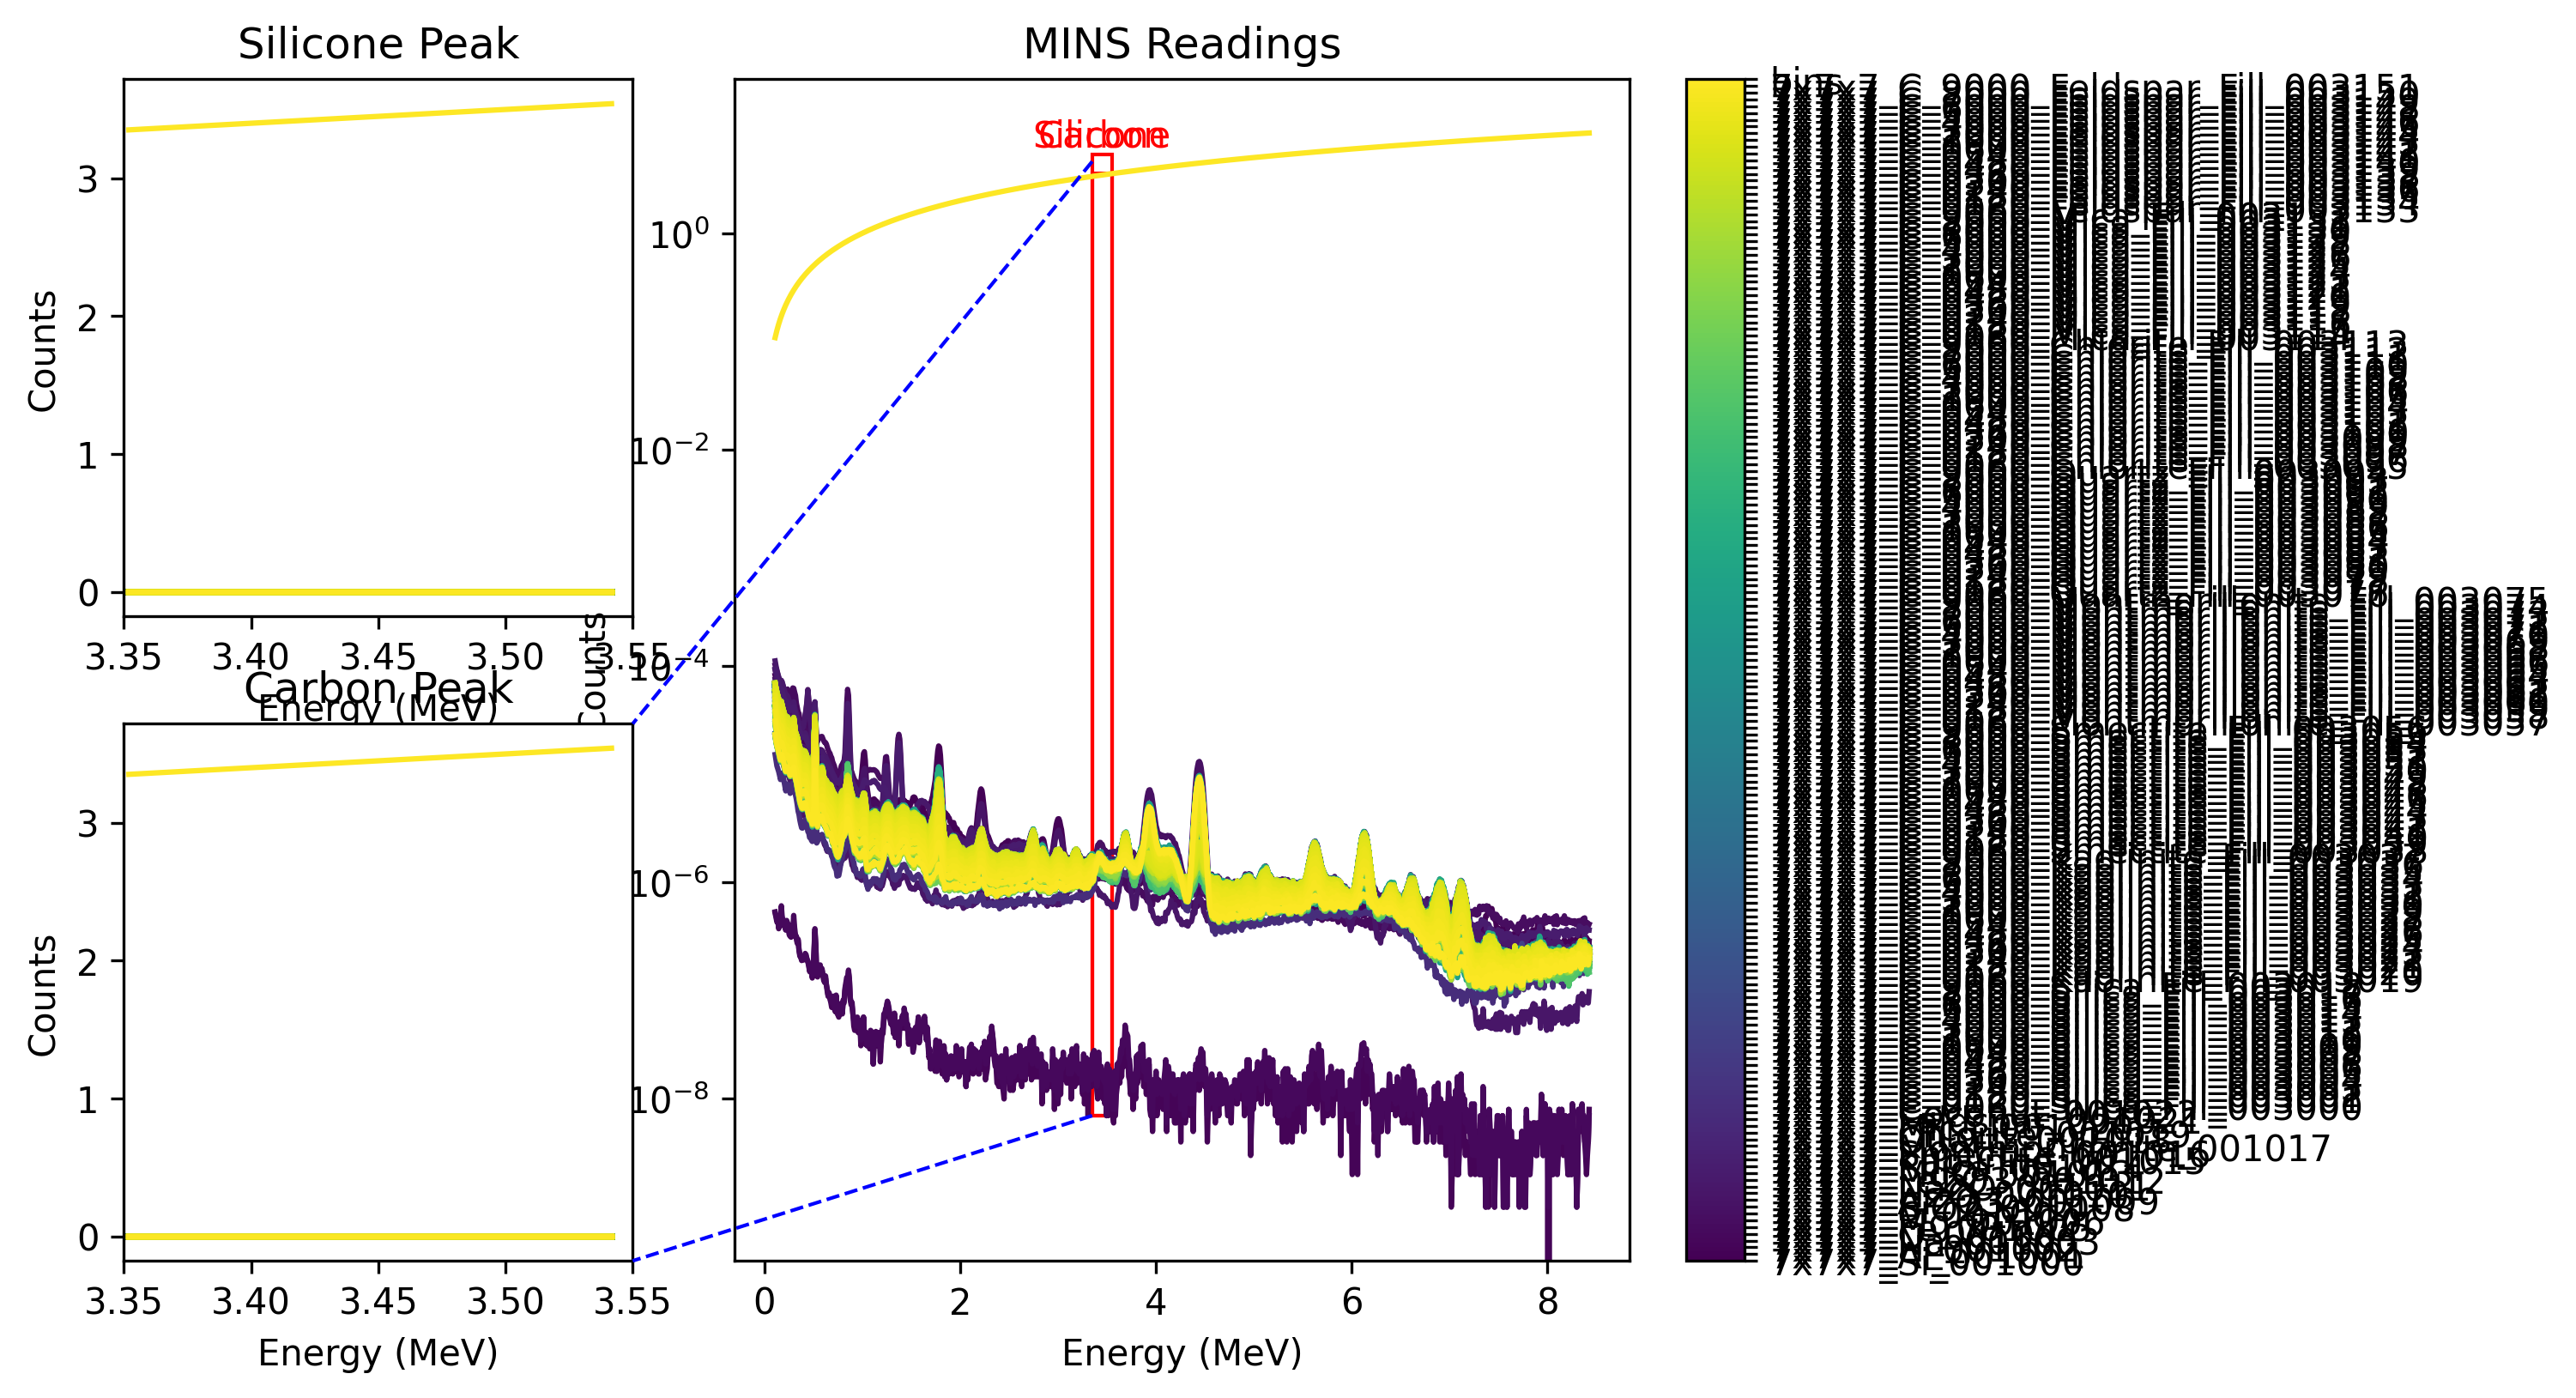

In [76]:
cap.plot.multi_spectrum(
    df=detector_df,
    bins=detector_bins,
    c_window=c_window,
    si_window=si_window,
    show=True,
    )